# Properties of relations

## MTH 325: Discrete Structures for Computer Science 2

## Overview


__Summary:__ In this lesson we look at the notion of "linking" two relations together. If we have a relation $r$ that connects points in a set $A$ to points in a set $B$, and a second relation $s$ that connects points in $B$ to points in a third set $C$, then how are points in $A$ connected to points in $C$? The resulting relation is known as the __composition__ of $s$ and $r$. This lesson is all about mastering the process of finding compositions of relations, especially compositions of relations _with themselves_, which has applications to social networks (and other kinds of networks). 

This lesson addresses the following learning target(s): 

+ __3.4__: Compute the composition of two relations and raise a single relation to a positive integer power.

## Background

Let's go back to the example from two lessons ago with the Math Department, where we had a relation from the set of department faculty $A = \{ \text{Alice, Bob, Chuck, Dave, Ed}\}$ to the set of department committees $B = \{\text{Advisory, Student Affairs, Curriculum}\}$. As a list of tuples, this relation was represented as: 

    [(Alice, Advisory), (Alice, Student Affairs), (Bob, Advisory), (Chuck, Curriculum), (Dave, Curriculum), 
    (Dave, Student Affairs), (Ed, Curriculum)]
    
What we are going to do now is add a _new_ relation into the mix. This relation pairs off _committees_ with the _days of the week on which the committees meet_. Here is a table with this info: 

| Committee:      | Meets on these days:           | 
|:--------------- | :--------------------------    | 
| Advisory        | Friday                         | 
| Curriculum      | Monday and Friday              |
| Student Affairs | Monday and Wednesday           | 

This is really _another relation_. It is a relation from the set $B = \{\text{Advisory, Student Affairs, Curriculum}\}$ to the set that we will call $C = \{ \text{Monday, Wednesday, Friday} \}$ As a list of tuples, this relation would look like this: 

    [(Advisory, Friday), (Curriculum, Monday), (Curriculum, Friday), (Student Affairs, Monday), 
     (Student Affairs, Wednesday)] 
     
A logical question we might ask is: 

>What days of the week should each faculty member set aside for attending committee meetings? 

Let's answer that question one faculty member at a time. 

+ __Alice__ belongs to the Advisory Committee because `(Alice, Advisory)` is in the first relation. The Advisory Committee meets on Friday because `(Advisory, Friday)` is in the second relation. Therefore Alice needs to set aside Friday for that committee. Similarly, Alice is on the Student Affairs committee because `(Alice, Student Affairs)` is in the first relation; and Student Affairs meets on Monday because `(Student Affairs, Wednesday)` is in the second relation -- therefore Alice must also set aside Wednesdays. By the same reasoning, since `(Alice, Student Affairs)` is in the first relation and `(Student Affairs, Friday)` is in the second, Alice also needs to set aside Fridays for meetings. 
+ __Bob__ is on just the Advisory commitee because `(Bob, Advisory)` is in the first relation. The pair `(Advisory, Friday)` is in the second relation, so this tells us Bob needs to set aside Fridays. 

Maybe you get the picture at this point. Stop reading for a second and make a table that looks like the following, except this time in the second column don't put the _committees_ that each faculty belongs to but rather the _days_ that the faculty should set aside for meetings. The first two rows are done for you.

| Faculty | Days that this faculty member should set aside | 
|:------- | :---------------------------------------- |
| Alice   |  Monday, Wednesday, Friday           |
| Bob     |  Friday                                 | 
| Chuck   |                                 | 
| Dave    |                      | 
| Ed      |                                 | |

Here are some major conceptual points you want to make sure you understand about this process. 

+ The table you filled in above is __yet another relation__.
+ Whereas the first relation (faculty to committees) was a relation from the set $A$ to the set $B$, and the second relation (committees to days) was a relation from $B$ to $C$, this new relation is __from $A$ to $C$__. In a sense (made precise below) this new relation "passes through" the set $B$ (committees).  

As a list of tuples, this relation would be represented as the following (SPOILERS -- fill the table in first): 

    [(Alice, Monday), (Alice, Wednesday), (Alice, Friday), (Bob, Friday), (Chuck, Monday), (Chuck, Friday),
     (Dave, Monday), (Dave, Wednesday), (Dave, Friday), (Ed, Monday), (Ed, Friday)] 
     
The final and maybe most important conceptual point is: 

+ The way we decide if a pair belongs to this list is to __first look at the pairs in the first relation__ (faculty > committees) and then __find a "link" in the second relation__ (committees > days) and then __connect the first coordinate from the first relation to the second coordinate in the second relation__. (Example: `(Alice, Advisory)` and `(Advisory, Friday)` gives us `(Alice, Friday)`. The Advisory committee in the "middle" set is the link.) 

This idea of "linking" two relations together is extremely powerful and useful. We will give it a real definition and name here: 

>__Definition:__ If $r$ is a relation from a set $A$ to a set $B$, and $s$ is a relation from $B$ to a set $C$, then the __composition__ of $r$ and $s$ is denoted $s \circ r$ or just $sr$, and it is defined to be the set of pairs: 
$$sr = \{ (a,c) \, : \, (\exists b \in B) \, (a,b) \in r \, \text{and} \, (b,c) \in s \}$$

The English version of the last line says: The composition $sr$ consist of all pairs $(a,c)$ such that there is a point $b$ in $B$ such that $(a,b)$ is in the relation $r$ and $(b,c)$ is in the relation $s$. In other words, a pair or tuple $(a,c)$ belongs to the composition if there is a "linking" element $b$ where $(a,b)$ is in the first relation and $(b,c)$ is in the second, just like in our everyday example. We do, however, need this formality here for working with theorems and proofs about compositions, so strive to understand the language. 

__Note:__ _The order of the composition matters._ If $r$ is the relation that connects faculty to committees and $s$ is the relation that connects committees to days of the week, then $sr$ connects faculty to days of the week. If we reversed the order and wrote $rs$, this would not make sense because $rs$ would be a relation that goes from committees to days of the week and then from faculty to committees. 

---

Let's look at a second example, this time going back to the ChapSnat social network. Remember that as a list of tuples, ChapSnat was: 

    [(Ronald, Uriah), (Ronald, Trish), (Scott, Uriah), (Scott, Trish), (Uriah, Ronald), (Uriah, Scott), 
    (Uriah, Trish), (Uriah, Victoria), (Victoria, Uriah), (Victoria, Scott)]
    
Also, since ChapSnat was a relation from a set _to itself_ (and not from one set to a different set, like the committees relation) then we can look at its directed graph. Let's do that here: 

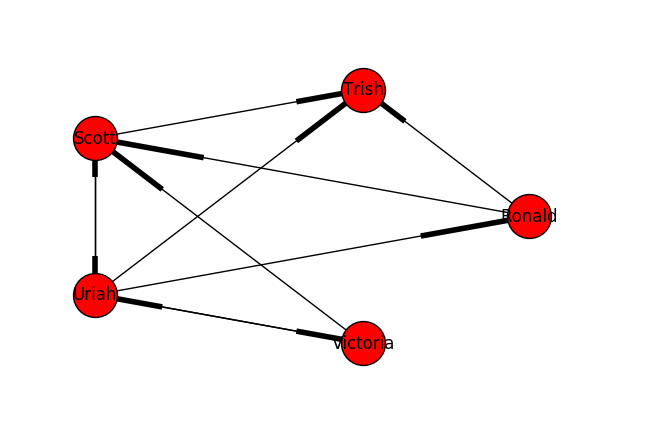

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

chapsnat_edges = [('Ronald', 'Scott'), ('Ronald', 'Trish'), ('Scott', 'Uriah'), ('Scott', 'Trish'), 
                  ('Uriah', 'Ronald'), ('Uriah', 'Scott'), ('Uriah', 'Trish'), ('Uriah', 'Victoria'), 
                  ('Victoria', 'Uriah'), ('Victoria', 'Scott')]

chapsnat = nx.DiGraph(chapsnat_edges)
nx.draw_circular(chapsnat, with_labels = True, node_size = 1000)
plt.show()

Let's call the ChapSnat relation $b$ and ask ourselves: __What does the relation $b \circ b$ look like?__ That is, if I take $b$ and compose it with itself, what pairs are in the resulting relation? 

First of all a notational aside: We often write $b^2$ for $b \circ b$. This is not multiplication of course, because it doesn't make semantic sense to "multiply" relations. This is repeated compostion. We can also talk about $b^3$ which means composing $b^2$ with $b$; $b^4$ which means composing $b^3$ with $b$; and so on. And we will look closely at this in class activities. 

Back to the question: What pairs belong to $b^2$? Let's start with Ronald. 

+ The pair `(Ronald, Scott)` is in $b$. Is there a "linking" pair, that is, a pair that starts with Scott? 
+ Yes -- there are two such pairs, `(Scott, Uriah)` and `(Scott, Trish)`. 
+ Therefore the pairs `(Ronald, Uriah)` and `(Ronald, Trish)` are in the composition $b^2$.

Also `(Ronald, Trish)` is in the original relation $b$. But there are no linking pairs, that is, there are no pairs that start with Trish. So there are no additional pairs starting with Ronald in the composition. 

Let's look at Victoria next: 

+ Pairs that begin with Victoria: `(Victoria, Uriah), (Victoria, Scott)`. 
+ Linking pairs (pairs whose first coordinate appears as a second coordinate for Victoria): `(Uriah, Ronald), (Uriah, Scott), (Uriah, Trish), (Uriah, Victoria), (Scott, Uriah), (Scott, Trish)`.
+ Therefore here are the pairs in the composition whose first coordinate is Victoria: `(Victoria, Ronald), (Victoria, Scott), (Victoria, Trish), (Victoria, Victoria), (Victoria, Uriah)`. (The pair `(Victoria, Trish)` is encountered twice but technically we are forming a set, and in a set, we do not list duplicate elements.)

If you continue this process for the other people in BookFace, the entire composition would consist of the following pairs: 

    [(Ronald, Uriah), (Ronald, Trish), 
     (Scott, Ronald), (Scott, Scott), (Scott, Trish), (Scott, Victoria), 
     (Uriah, Scott), (Uriah, Trish), (Uriah, Uriah), 
     (Victoria, Ronald), (Victoria, Scott), (Victoria, Trish), (Victoria, Victoria), (Victoria, Uriah)]
     
For your practice, check that the above is correct. 

What does the composite relation $b^2$ actually _tell_ us in real-life terms? Let's make its digraph: 

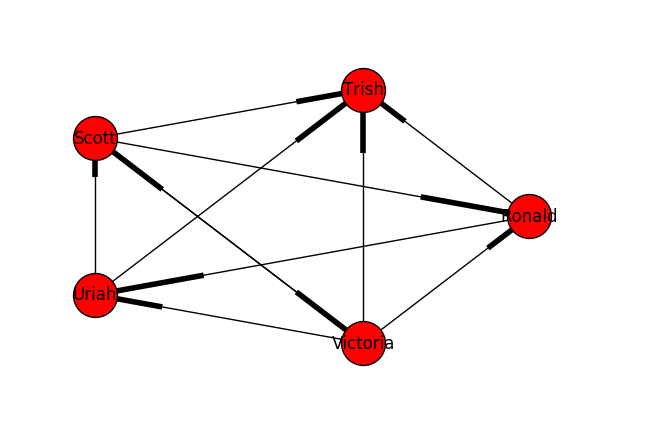

In [4]:
bsquared = [('Ronald', 'Uriah'), ('Ronald', 'Trish'), 
 ('Scott', 'Ronald'), ('Scott', 'Scott'), ('Scott', 'Trish'), ('Scott', 'Victoria'), 
 ('Uriah', 'Scott'), ('Uriah', 'Trish'), ('Uriah', 'Uriah'), 
 ('Victoria', 'Ronald'), ('Victoria', 'Scott'), ('Victoria', 'Trish'), ('Victoria', 'Victoria'), ('Victoria', 'Uriah')]

bsquaredgraph = nx.DiGraph(bsquared)
nx.draw_circular(bsquaredgraph, with_labels = True, node_size = 1000)
plt.show()

Note too that there are several loops in this digraph that don't appear in the visualization because of the limitations of Matplotlib. Look at the edge list to see those. 

If we compare this to the original digraph for $b$ above, there's some information that comes out that could be useful. 

+ First of all notice that not every edge in the original $b$ graph appears in the $b^2$ graph. For example there is no edge from Ronald to Scott in $b^2$. This is a different relation, and it doesn't necessarily "include" the original. 
+ Notice for example that in the original, Victoria does not follow Trish. But in $b^2$ there is an edge pointing from Victoria to Trish in the $b^2$ graph. Why is this? It's because although Victoria does not follow Trish directly, _she follows someone who follows Trish_. Because there is a "link", we have an edge from Victoria to Trish in the composition. 
+ Likewise Ronald does not follow Uriah in the original ChapSnat. But Ronald does follow Scott, who follows Uriah. Hence there's an edge in $b^2$ from Ronald to Uriah. 

In other words this $b^2$ graph is giving us information not about who follows whom, but rather about the __second-level relationships__ in the social network -- the users who are "friends of a friend". [Some companies](http://www.linkedin.com) are making a lot of money off of determining information about second-, third-, etc. level relationships among its users. 

## Other Resources for Learning

Here's a 10-minute video with more examples of composing relations: https://www.youtube.com/watch?v=G7rGep_v-EM  